# Ejercicio número 1 - Regresión Lineal Años de Aprendizaje vs Salarios

> En este ejercicio, implementará la regresión lineal y verá cómo funciona con los datos.

## 1. Introducción al Problema
En este ejercicio, implementarás regresión lineal con una variable para predecir salarios basados en años de experiencia profesional. Supón que eres el director de Recursos Humanos de una empresa tecnológica y necesitas establecer bandas salariales justas para diferentes niveles de experiencia. La empresa ya tiene datos históricos de salarios y años de experiencia de sus empleados actuales y anteriores.

El archivo salary_data.csv contiene el conjunto de datos para nuestro problema de regresión lineal. La primera columna representa los años de experiencia profesional y la segunda columna representa el salario anual en dólares.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import pandas as pd
import requests
from io import StringIO



# URL CORRECTA (formato raw):
url = 'https://raw.githubusercontent.com/Carlos01rondon/salarios/main/Salary_dataset.csv'

try:
    # 1. Descargar el contenido
    response = requests.get(url)
    response.raise_for_status()  # Verifica errores HTTP
    
    # 2. Leer como CSV
    df = pd.read_csv(StringIO(response.text))
    
    # 3. Mostrar resultados
    print("✅ Archivo cargado correctamente!")
    print(f"📊 Dimensiones: {df.shape[0]} filas, {df.shape[1]} columnas")
    print("\n🔍 Primeras 5 filas:")
    print(df.head())
    
    print("\n📋 Información del dataset:")
    print(df.info())

except Exception as e:
    print(f"🚨 Error: {str(e)}")
    print("\💡 Posibles soluciones:")
    print("1. Verifica que la URL existe abriéndola en tu navegador")
    print("2. Comprueba que el repositorio es público")
    print("3. Intenta con este enlace de prueba:")
    print("pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')")


✅ Archivo cargado correctamente!
📊 Dimensiones: 30 filas, 3 columnas

🔍 Primeras 5 filas:
   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0

📋 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes
None


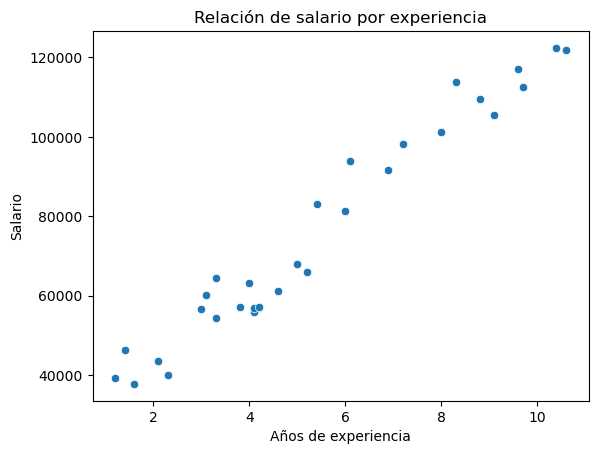

In [5]:
ax = sns.scatterplot(x='YearsExperience', y='Salary', data=df)
ax.set(xlabel='Años de experiencia', ylabel='Salario', title='Relación de salario por experiencia');
# Mostrar el gráfico
plt.show()


La trama muestra que tienen una relación lineal.

### 1.2 Gradient Descent

Ajuste los parámetros de regresión lineal al conjunto $\theta$ de datos utilizando el descenso de gradiente 

#### 1.2.1 Ecuaciones


 hipothesis of  regresión linear es :

$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

El objetivo de la regresión lineal es minimizar la función de costo (Error Cuadrático Medio - RMSE):

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 $$

Para minimizar el costo $J(\theta)$  usaremos el algoritmo de descenso por gradiente por lotes (batch gradient descent). En cada iteración se realiza la siguiente actualización:

$$ \theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $$ 

(Simultaneamente  $\theta_j$ for all $j$). con cada paso tus paramestros  $\theta_j$ se acerca al valor optimo que minimiza  $J(\theta)$.

#### 1.2.2 Implementacion

Necesitamos adiocionar otra dimencion, columnas de unos para  $\theta_0$ termino del intercepto. esto permite tratar  $\theta_0$ como otra variable 

In [6]:
# Número de muestras (filas) en el DataFrame
m = df.shape[0]  # Construcción de la matriz de características X:

# Se agrega una columna de unos (para el término independiente) y se concatena con la variable 'YearExperience'
X = np.hstack((np.ones((m,1)), df.YearsExperience.values.reshape(-1,1)))

# Vector de salida/etiqueta y: se convierte la columna 'Salary' en un vector columna
y = np.array(df.Salary.values).reshape(-1,1)

# Inicialización del vector de parámetros theta con ceros (dimensión: número de características + 1)
theta = np.zeros(shape=(X.shape[1],1))
# Número de iteraciones para el algoritmo de descenso por gradiente
iterations = 1500

# Tasa de aprendizaje (learning rate)
alpha = 0.01

###$$$$$ ### POr favor imprimir cada cambio 

#### 1.2.3 Calculando la Funcion de Costo $J(\theta)$

In [7]:
def compute_cost_one_variable(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * (np.sum((h - y)**2))
    return J

In [8]:
J = compute_cost_one_variable(X, y, theta)
print('With theta = [0 ; 0]\nCost computed =', J)
print('Expected cost value (approx) 32.07')

With theta = [0 ; 0]
Cost computed = 3251553638.866667
Expected cost value (approx) 32.07


In [9]:
J = compute_cost_one_variable(X, y, [[-1],[2]])
print('With theta = [-1 ; 2]\nCost computed =', J)
print('Expected cost value (approx) 54.24')

With theta = [-1 ; 2]
Cost computed = 3250659697.892
Expected cost value (approx) 54.24


#### 1.2.4 GradientE Descendiente
es un algoritmo de optimización genérico que mide el gradiente local de la función de costo con respecto al parámetro $\theta$ 
y avanza en la dirección del gradiente descendente.

Algoritmo:

repeat until convergence:
$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1) = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $$ 

where $j=0,1$; $\alpha$ is the learning rate (the steps to update J); $\frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1)$ is a derivative.

* Tasa de aprendizaje demasiado pequeña: descenso de gradiente lento
* Tasa de aprendizaje demasiado grande: el descenso del gradiente puede sobrepasar el mínimo y puede no converger

In [10]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost_one_variable(X, y, theta)

    return theta, J_history

In [11]:
theta, _ = gradient_descent(X, y, theta, alpha, iterations)
print('Theta found by gradient descent:\n', theta)
print('Expected theta values (approx)\n -3.6303\n  1.1664')

Theta found by gradient descent:
 [[23798.65974533]
 [ 9604.00088843]]
Expected theta values (approx)
 -3.6303
  1.1664


#### Plot the linear fit:

In [12]:
ax = sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.plot(X[:,1], X.dot(theta), color='r')
ax.set(xlabel='Años de experiencia', ylabel='Salario', title='Training data with linear regression fit');

In [13]:
y_pred = np.array([1, 3.5]).dot(theta)
f'For YearsExperience = 35,000, we predict a salary of {y_pred[0]*10000}'

'For YearsExperience = 35,000, we predict a salary of 574126628.5482147'

In [14]:
y_pred = np.array([1, 7]).dot(theta)
f'For YearsExperience  = 70,000, we predict a salary of {y_pred[0]*10000}'

'For YearsExperience  = 70,000, we predict a salary of 910266659.6431345'

### 1.3 Visualizing $J(\theta)$

La función de costo $J(\theta)$ tiene forma de cuenco y posee un mínimo global. Este mínimo es el punto óptimo para $\theta_0$ y $\theta_1$, y cada paso del descenso por gradiente se acerca a ese punto.


In [15]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

In [16]:
J_vals = np.zeros(shape=(len(theta0_vals), len(theta1_vals)))

In [17]:
for i in range(0, len(theta0_vals)):
    for j in range(0, len(theta1_vals)):
        J_vals[i,j] = compute_cost_one_variable(X, y, [[theta0_vals[i]], [theta1_vals[j]]])

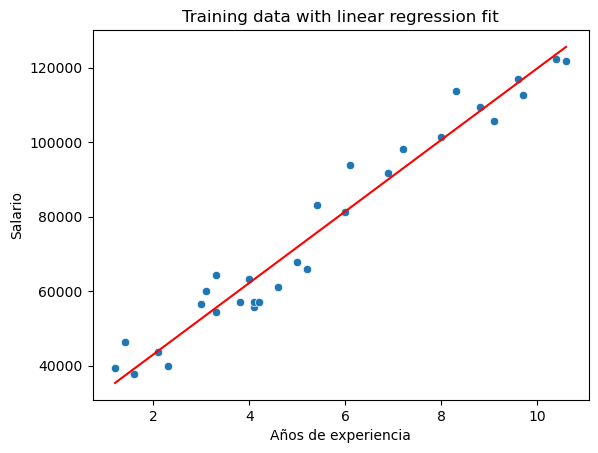

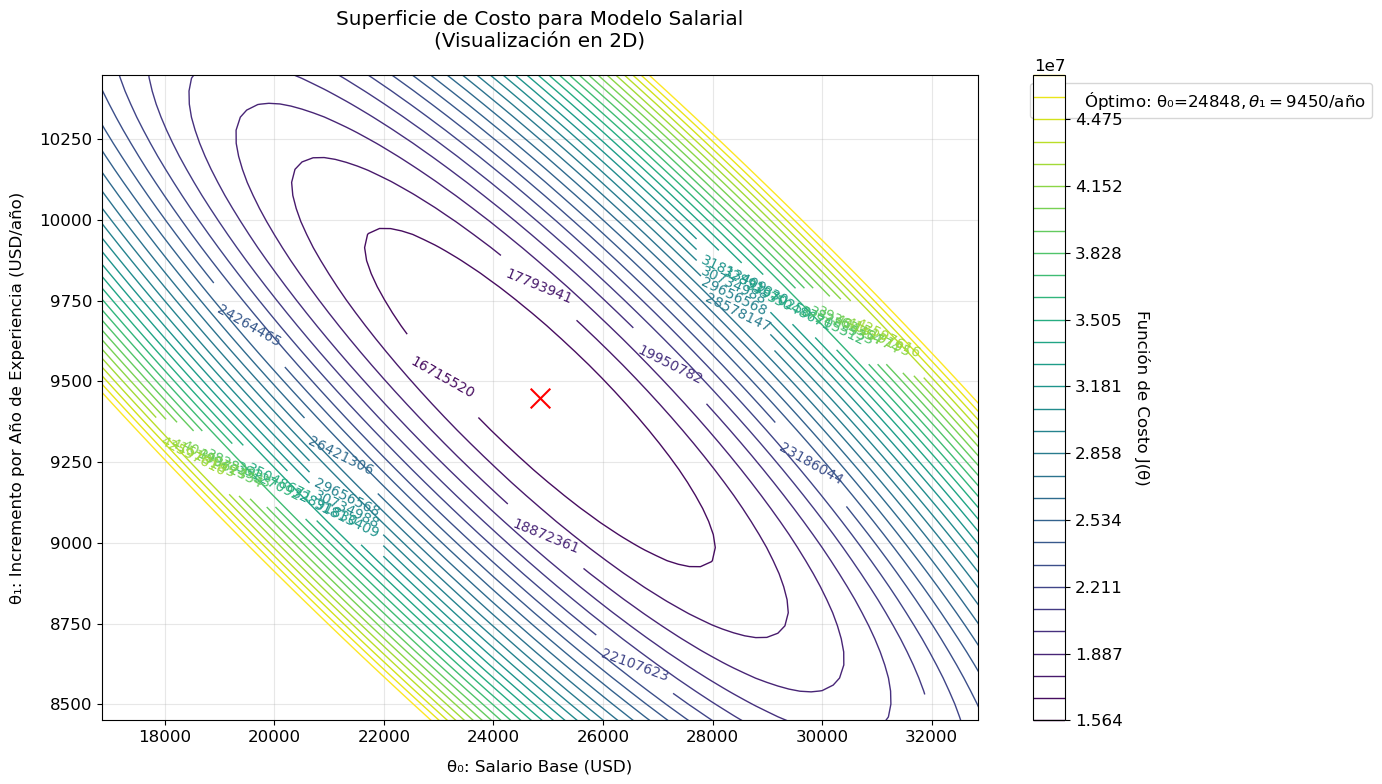

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Cargar y preparar datos correctamente
url = 'https://raw.githubusercontent.com/Carlos01rondon/salarios/main/Salary_dataset.csv'
df = pd.read_csv(url)

# Convertir a arrays numpy y asegurar dimensiones correctas
X = df['YearsExperience'].values.reshape(-1, 1)  # Forma (n, 1)
X = np.hstack([np.ones((X.shape[0], 1)), X])    # Forma (n, 2) [columna de unos + feature]
y = df['Salary'].values.reshape(-1, 1)          # Forma (n, 1)

# 2. Función de costo corregida (compatible con cualquier implementación)
def compute_cost(X, y, theta):
    """
    Calcula el costo de la regresión lineal
    Args:
        X: matriz (n, 2) con columna de unos
        y: vector (n, 1)
        theta: vector (2, 1)
    """
    m = len(y)
    predictions = X @ theta  # Producto matricial (n,2)@(2,1)=(n,1)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

# 3. Calcular theta óptimo (solución analítica)
theta = np.linalg.inv(X.T @ X) @ X.T @ y  # Forma (2, 1)

# 4. Rangos para visualización (ajustados a theta)
theta0_range = np.linspace(theta[0,0]-10000, theta[0,0]+10000, 100)  # Rango para intercepto
theta1_range = np.linspace(theta[1,0]-2000, theta[1,0]+2000, 100)    # Rango para pendiente

# 5. Calcular matriz de costos
J_vals = np.zeros((len(theta0_range), len(theta1_range)))

for i, t0 in enumerate(theta0_range):
    for j, t1 in enumerate(theta1_range):
        theta_temp = np.array([[t0], [t1]])  # Mantener forma (2, 1)
        J_vals[i, j] = compute_cost(X, y, theta_temp)

# 6. Visualización profesional
plt.figure(figsize=(14, 8))
plt.rcParams.update({'font.size': 12})

# Niveles de contorno alrededor del mínimo
min_cost = J_vals.min()
levels = np.linspace(min_cost, min_cost*3, 30)

# Gráfico de contorno
contour = plt.contour(theta0_range, theta1_range, J_vals.T, 
                     levels=levels, cmap='viridis', linewidths=1)
plt.clabel(contour, inline=True, fontsize=10)

# Punto óptimo
plt.scatter(theta[0], theta[1], color='red', s=200, marker='x', 
           label=f'Óptimo: θ₀=${theta[0,0]:.0f}, θ₁=${theta[1,0]:.0f}/año')

# Configuración estética
plt.title('Superficie de Costo para Modelo Salarial\n(Visualización en 2D)', pad=20)
plt.xlabel('θ₀: Salario Base (USD)', labelpad=10)
plt.ylabel('θ₁: Incremento por Año de Experiencia (USD/año)', labelpad=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.colorbar(contour).set_label('Función de Costo J(θ)', rotation=270, labelpad=20)
plt.grid(alpha=0.3)

# Ajustar vista al área de interés
plt.xlim(theta[0,0]-8000, theta[0,0]+8000)
plt.ylim(theta[1,0]-1000, theta[1,0]+1000)

plt.tight_layout()
plt.show()

### 1.4 Usando sklearn

Intercepto (theta_0): -3.8957808783118537
Coeficiente (theta_1): 1.193033644189594


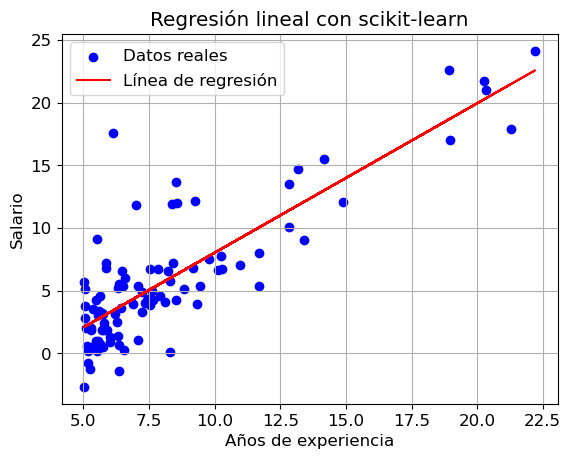

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Cargar los datos
url = 'https://raw.githubusercontent.com/damasoer/MACHINE-LEARNING-I/main/data/ex1data1.txt'
df = pd.read_csv(url, sep=",", header=None)
df.columns = ['YearsExperience', 'Salary']

# Preparar X e y
X = df[['YearsExperience']]  # variable independiente (característica)
y = df['Salary']        # variable dependiente (objetivo)

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Mostrar parámetros del modelo
print(f"Intercepto (theta_0): {model.intercept_}")
print(f"Coeficiente (theta_1): {model.coef_[0]}")

# Predicción de valores ajustados
y_pred = model.predict(X)

# Graficar los datos y la línea de regresión
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred, color='red', label='Línea de regresión')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.title('Regresión lineal con scikit-learn')
plt.legend()
plt.grid(True)
plt.show()

### 1.4 Usando statsmodels

Datos cargados correctamente. Primeras filas:
   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0

RESUMEN DEL MODELO DE REGRESIÓN LINEAL
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           1.14e-20
Time:                        19:58:00   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1     

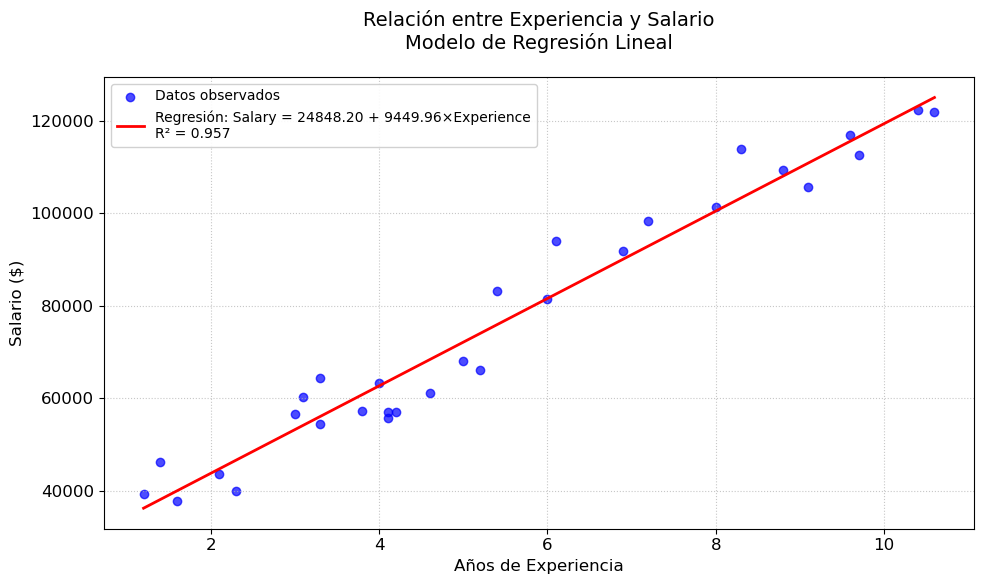

In [20]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Configuración para evitar warnings
pd.set_option('future.no_silent_downcasting', True)

# Cargar los datos
url = 'https://raw.githubusercontent.com/Carlos01rondon/salarios/main/Salary_dataset.csv'
try:
    df = pd.read_csv(url)
    print("Datos cargados correctamente. Primeras filas:")
    print(df.head())
except Exception as e:
    print(f"Error al cargar los datos: {e}")
    raise

# Verificar y limpiar columnas
required_columns = ['YearsExperience', 'Salary']
if not all(col in df.columns for col in required_columns):
    print("\nColumnas encontradas:", df.columns.tolist())
    raise ValueError("El dataset no contiene las columnas esperadas")

# Preparar variables para regresión
X = sm.add_constant(df['YearsExperience'])  # Agrega intercepto
y = df['Salary']

# Modelo de regresión
model = sm.OLS(y, X).fit()

# Resultados del modelo
print("\n" + "="*50)
print("RESUMEN DEL MODELO DE REGRESIÓN LINEAL")
print("="*50)
print(model.summary())

# Predicciones (usando iloc para evitar warnings)
df['y_pred'] = model.predict(X)

# Gráfico mejorado
plt.figure(figsize=(10, 6))
plt.scatter(df['YearsExperience'], df['Salary'], 
            color='blue', alpha=0.7, label='Datos observados')

# Usamos iloc para acceder a los parámetros
reg_line = (f'Regresión: Salary = {model.params.iloc[0]:.2f} + '
            f'{model.params.iloc[1]:.2f}×Experience\n'
            f'R² = {model.rsquared:.3f}')

plt.plot(df['YearsExperience'], df['y_pred'], 
         color='red', linewidth=2, label=reg_line)

# Configuración del gráfico
plt.xlabel('Años de Experiencia', fontsize=12)
plt.ylabel('Salario ($)', fontsize=12)
plt.title('Relación entre Experiencia y Salario\nModelo de Regresión Lineal', 
          fontsize=14, pad=20)
plt.legend(fontsize=10, framealpha=0.9)
plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()

# Mostrar gráfico
plt.show()


In [21]:
## Validacion de supuertos de Modelos 


DIAGNÓSTICO DE NORMALIDAD DE RESIDUOS

► Test de Shapiro-Wilk:
  - Estadístico: 0.9523
  - p-valor: 0.1952
  ✅ No se rechaza normalidad (p > 0.05)


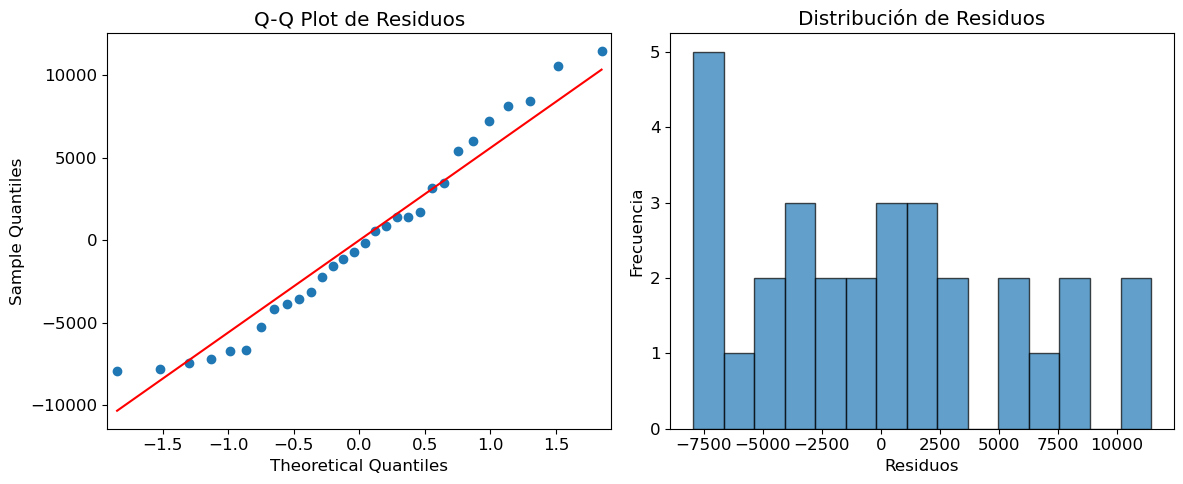


DIAGNÓSTICO DE HOMOCEDASTICIDAD

► Test de Breusch-Pagan:
  - Estadístico LM: 0.3991
  - p-valor LM: 0.5276
  - Estadístico F: 0.3775
  - p-valor F: 0.5439

  ✅ No hay evidencia de heterocedasticidad (varianza constante)


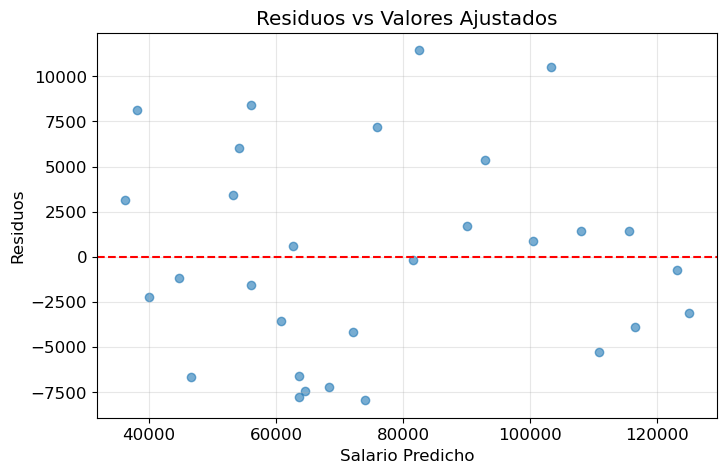


DIAGNÓSTICO DE AUTOCORRELACIÓN

► Estadístico Durbin-Watson: 9449.9623
  ❌ Posible autocorrelación negativa

RESUMEN DE DIAGNÓSTICO DEL MODELO
1. Normalidad de residuos: Cumple
2. Homocedasticidad: Cumple
3. Autocorrelación: No cumple


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.graphics.gofplots import qqplot

# Obtener residuos del modelo
residuals = model.resid
fitted_values = model.fittedvalues

# --- 1. Prueba de Normalidad de los residuos ---
print("\n" + "="*60)
print("DIAGNÓSTICO DE NORMALIDAD DE RESIDUOS")
print("="*60)

shapiro_test = shapiro(residuals)
print(f"\n► Test de Shapiro-Wilk:")
print(f"  - Estadístico: {shapiro_test.statistic:.4f}")
print(f"  - p-valor: {shapiro_test.pvalue:.4g}")  # Usamos notación científica si es muy pequeño

if shapiro_test.pvalue > 0.05:
    print("  ✅ No se rechaza normalidad (p > 0.05)")
else:
    print("  ❌ Se rechaza normalidad (p ≤ 0.05)")

# Gráfico Q-Q plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
qqplot(residuals, line='s', ax=plt.gca())
plt.title("Q-Q Plot de Residuos")

# Histograma de residuos
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=15, edgecolor='k', alpha=0.7)
plt.title("Distribución de Residuos")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# --- 2. Prueba de Homocedasticidad ---
print("\n" + "="*60)
print("DIAGNÓSTICO DE HOMOCEDASTICIDAD")
print("="*60)

bp_test = het_breuschpagan(residuals, X)
print("\n► Test de Breusch-Pagan:")
print(f"  - Estadístico LM: {bp_test[0]:.4f}")
print(f"  - p-valor LM: {bp_test[1]:.4g}")
print(f"  - Estadístico F: {bp_test[2]:.4f}")
print(f"  - p-valor F: {bp_test[3]:.4g}")

if bp_test[1] > 0.05:
    print("\n  ✅ No hay evidencia de heterocedasticidad (varianza constante)")
else:
    print("\n  ❌ Posible heterocedasticidad (varianza no constante)")

# Gráfico de residuos vs valores ajustados
plt.figure(figsize=(8, 5))
plt.scatter(fitted_values, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuos vs Valores Ajustados")
plt.xlabel("Salario Predicho")
plt.ylabel("Residuos")
plt.grid(True, alpha=0.3)
plt.show()

# --- 3. Autocorrelación ---
print("\n" + "="*60)
print("DIAGNÓSTICO DE AUTOCORRELACIÓN")
print("="*60)

dw_statistic = float(model.summary().tables[1].data[2][1])
print(f"\n► Estadístico Durbin-Watson: {dw_statistic:.4f}")

if 1.5 < dw_statistic < 2.5:
    print("  ✅ No hay evidencia de autocorrelación significativa")
elif dw_statistic <= 1.5:
    print("  ❌ Posible autocorrelación positiva")
else:
    print("  ❌ Posible autocorrelación negativa")

# --- Resumen de diagnóstico ---
print("\n" + "="*60)
print("RESUMEN DE DIAGNÓSTICO DEL MODELO")
print("="*60)
print(f"1. Normalidad de residuos: {'Cumple' if shapiro_test.pvalue > 0.05 else 'No cumple'}")
print(f"2. Homocedasticidad: {'Cumple' if bp_test[1] > 0.05 else 'No cumple'}")
print(f"3. Autocorrelación: {'Cumple' if 1.5 < dw_statistic < 2.5 else 'No cumple'}")

##  Crear el Q-Q plot

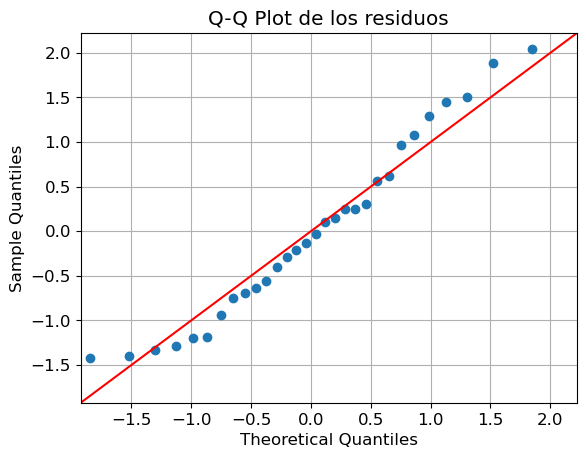

In [23]:
# Crear el Q-Q plot
sm.qqplot(residuals, line='45', fit=True)

plt.title("Q-Q Plot de los residuos")
plt.grid(True)
plt.show()

## 2. Regresión lineal con multiples variables

>En este ejercicio, implementarás un modelo de regresión lineal múltiple para predecir los ingresos salariales en función de dos variables clave. Imagina que trabajas en el departamento de Recursos Humanos de una empresa y necesitas establecer un rango salarial justo para nuevos empleados, considerando su perfil profesional.

>El archivo regresion_lineal_multiple_salarios.csv contiene datos de ejemplo con:

>Primera columna (edad): Años de edad del empleado.

>Segunda columna (experiencia): Años de experiencia laboral en el campo.

>Tercera columna (ingresos): Salario anual (en dólares o moneda local), que es la variable objetivo a predecir.
### 2.1 Feature Normalization

In [24]:
import pandas as pd
import requests
from io import StringIO

# URL CORRECTA para archivos RAW en GitHub (sin /blob/)
url = 'https://raw.githubusercontent.com/Carlos01rondon/salarios/main/regresion_lineal_multiple_salarios.csv'

try:
    # Descargar el contenido
    response = requests.get(url)
    response.raise_for_status()  # Verifica errores HTTP
    
    # Leer el CSV
    df2 = pd.read_csv(StringIO(response.text))
    
    # Verificar que tenemos los datos
    print("Primeras filas del dataset:")
    print(df2.head())
    
    # Renombrar columnas (si es necesario)
    if len(df2.columns) >= 3:
        df2.columns = ['age', 'experience', 'income']
        print("\nDataset preparado:")
        print(df2.describe().T)
    else:
        print("\nEl dataset no tiene suficientes columnas. Columnas actuales:", df2.columns.tolist())
        
except Exception as e:
    print(f"Error: {str(e)}")
    print("\nPosibles soluciones:")
    print("1. Verifica que la URL sea correcta y el archivo exista")
    print("2. Asegúrate de que el repositorio sea público")
    print("3. Revisa los nombres de las columnas en el archivo original")

Primeras filas del dataset:
   age  experience  income
0   25           1   30450
1   30           3   35670
2   47           2   31580
3   32           5   40130
4   43          10   47830

Dataset preparado:
            count      mean          std      min       25%      50%      75%  \
age          20.0     39.65    10.027725     23.0     31.50     40.0     47.0   
experience   20.0      6.20     4.124382      1.0      3.75      5.0      9.0   
income       20.0  40735.50  8439.797625  27840.0  35452.50  40190.0  45390.0   

                max  
age            58.0  
experience     17.0  
income      63600.0  


> Al observar los valores, noté que los ingresos son aproximadamente 10 veces mayores que los años de experiencia y 1000 veces mayores que la edad (en valores porcentuales). Cuando las características difieren significativamente en magnitud (como en este caso donde los ingresos están en decenas de miles mientras que edad/experiencia están en unidades o decenas), el escalado de características (normalización/estandarización) aplicado previamente puede hacer que:

>El descenso de gradiente converja más rápido
(Al evitar que variables con mayor magnitud dominen el proceso de optimización)

>Los coeficientes sean comparables
(Permite interpretar mejor la importancia relativa de cada variable predictora)

>Se eviten problemas numéricos
(Especialmente relevante cuando se usan métodos basados en distancias o productos matriciales)

Podemos acelerar el descenso por gradiente si hacemos que cada uno de nuestros valores de entrada esté, idealmente, en un rango similar  $-1 \leq x_i \leq1$ or $-0.5 \leq x_i \leq0.5$.

* Escala de características: implica dividir los valores de entrada por el rango (es decir, el valor máximo menos el valor mínimo) de la variable de entrada.
* Normalización de media: implica restar el valor promedio de una variable de entrada de los valores de esa variable de entrada

$x_i := \frac{x_i - \mu_i}{s_i}$, wher $\mu_i$ is the average of all the values for features (i) and $s_i$ is the range of values (max-min), the standard deviation.

In [25]:
def feature_normalize(X, mean=np.zeros(1), std=np.zeros(1)):
    X = np.array(X)
    if len(mean.shape) == 1 or len(std.shape) == 1:
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0, ddof=1)

    X = (X - mean)/std
    return X, mean, std

In [26]:
X_norm, mu, sigma = feature_normalize(df2[['age', 'experience']])


In [27]:
df2['age_normalized'] = X_norm[:,0]
df2['experience_normalized'] = X_norm[:,1]
df2[['age_normalized', 'experience_normalized']].describe().T

,count,mean,std,min,25%,50%,75%,max
age_normalized,20.0,1.526557e-16,1.0,-1.660397,-0.812747,0.034903,0.732968,1.829927
experience_normalized,20.0,-1.665335e-17,1.0,-1.260795,-0.594028,-0.290953,0.678890,2.618574


### 2.2 Gradient Descent

La única diferencia con el problema de regresión univariada es que ahora hay una característica más en la matriz X. La función de hipótesis y la regla de actualización del descenso por gradiente por lotes permanecen sin cambios.

Nota: En el caso multivariable, la función de costo también puede escribirse en la siguiente forma vectorizada:

$$J(\theta) = \frac{1}{2m}(X\theta - y)^T(X\theta - y)$$

In [28]:
def compute_cost(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * ((h-y).T.dot(h-y))
    return J

In [29]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

In [30]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

#### 2.2.1 Seleccionando Tasa de aprendizaje 

Consejos:
* Haz una gráfica con el número de iteraciones en el eje x. Ahora grafica la función de costo, $J(\theta)$, sobre el número de iteraciones del descenso por gradiente. Si $J(\theta)$ alguna vez aumenta, entonces probablemente necesites disminuir $\alpha$.
* Declara convergencia si $J(\theta)$ disminuye menos de E en una iteración, donde E es un valor pequeño como $10^{−3}$.


m = df2.shape[0]
X2 = np.hstack((np.ones((m,1)),X_norm))
y2 = np.array(df2.income.values).reshape(-1,1)
theta2 = np.zeros(shape=(X2.shape[1],1))

In [31]:
m = df2.shape[0]
X2 = np.hstack((np.ones((m,1)),X_norm))
y2 = np.array(df2.income.values).reshape(-1,1)
theta2 = np.zeros(shape=(X2.shape[1],1))

In [32]:
alpha = [0.3, 0.1, 0.03, 0.01]
colors = ['b','r','g','c']
num_iters = 50

Para α = 0.001: Costo final = 317257697.546783
Para α = 0.003: Costo final = 45125297.837350
Para α = 0.01: Costo final = 1033162.829201
Para α = 0.03: Costo final = 766962.806349


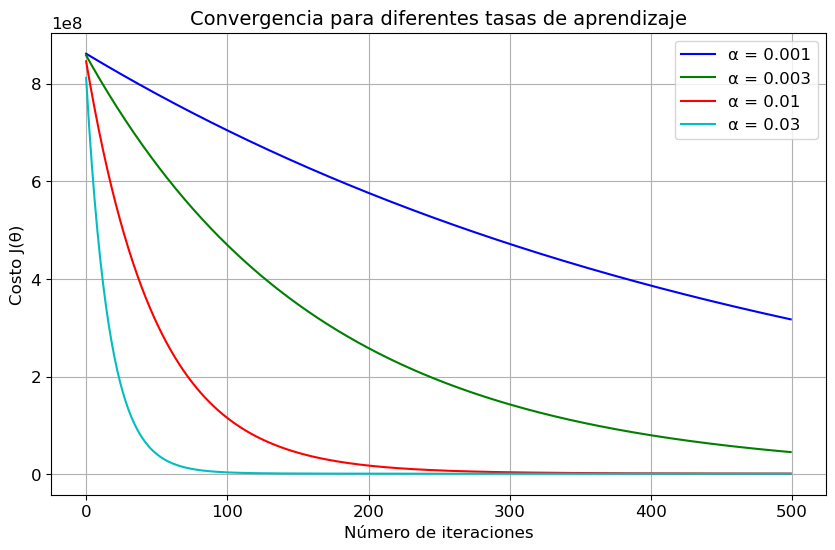

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Configuración inicial
alpha = [0.001, 0.003, 0.01, 0.03]  # Tasas de aprendizaje
num_iters = 500                       # Número de iteraciones
colors = ['b', 'g', 'r', 'c']         # Colores para cada curva

# Crear figura
plt.figure(figsize=(10, 6))

# Ejecutar para cada tasa de aprendizaje
for i in range(len(alpha)):
    # Inicializar parámetros en ceros
    theta = np.zeros((X2.shape[1], 1))
    
    # Ejecutar descenso de gradiente
    theta_opt, J_history = gradient_descent(X2, y2, theta, alpha[i], num_iters)
    
    # Graficar la convergencia del costo
    plt.plot(range(len(J_history)), J_history, colors[i], 
             label=f'α = {alpha[i]}')
    
    print(f"Para α = {alpha[i]}: Costo final = {J_history[-1].item():.6f}")  # Cambiado a .item()

# Personalizar el gráfico
plt.xlabel('Número de iteraciones', fontsize=12)
plt.ylabel('Costo J(θ)', fontsize=12)
plt.title('Convergencia para diferentes tasas de aprendizaje', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [34]:
iterations = 250
alpha = 0.1
theta2, J_history = gradient_descent(X2, y2, theta2, alpha, iterations)

print('Theta found by gradient descent:')
print(theta)

Theta found by gradient descent:
[[0.]
 [0.]
 [0.]]


### 2.3 Normal Equations

A closed-form solution to find $\theta$ without iteration.

$$\theta = (X^TX)^{-1}X^Ty$$

In [35]:
def normal_eqn(X, y):
    inv = np.linalg.pinv(X.T.dot(X))
    theta = inv.dot(X.T).dot(y)
    return theta

In [36]:
Xe = np.hstack((np.ones((m,1)),df2[['age', 'experience']].values))
theta_e = normal_eqn(Xe, y2)
theta_e

array([[31261.68985409],
       [  -99.19535546],
       [ 2162.40419192]])

### 2.4 Equivalent Code using Scikit-Learn

MAE  (Error Absoluto Medio): 6286.45
MSE  (Error Cuadrático Medio): 49830096.86
RMSE (Raíz del Error Cuadrático Medio): 7059.04
R²   (Coeficiente de determinación): 0.90


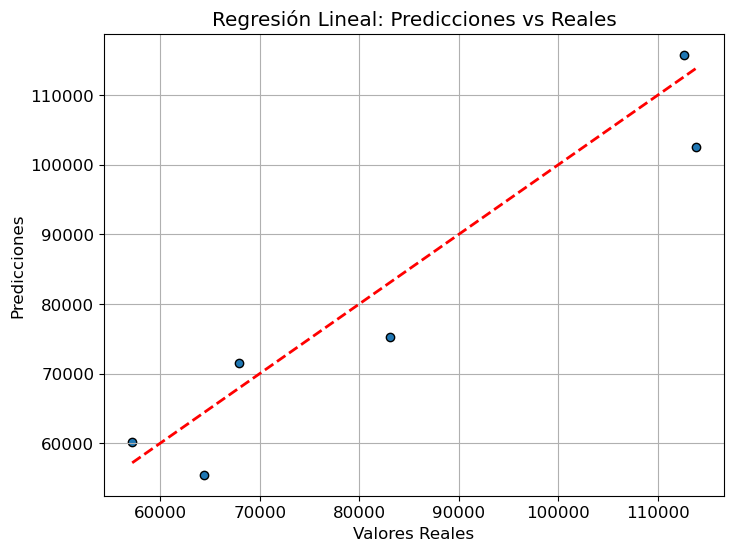

In [37]:

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# 2. División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Normalización (si no tienes X_norm)
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# 4. Entrenar el modelo
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 5. Predicciones
y_pred = lin_reg.predict(X_test)

# 6. Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE  (Error Absoluto Medio): {mae:.2f}")
print(f"MSE  (Error Cuadrático Medio): {mse:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f"R²   (Coeficiente de determinación): {r2:.2f}")

# 7. Visualización
# 7. Visualización de predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión Lineal: Predicciones vs Reales')
plt.grid(True)
plt.show()